En esta actividad, se va a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, se clasificarán imágenes de personajes de la conocida serie de los Simpsons.

<center><img src="https://i.imgur.com/i8zIGqX.jpg" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en imágenes de personajes de los Simpsons extraídas directamente de capítulos de la serie. Este dataset ha sido recopilado por [Alexandre Attia](http://www.alexattia.fr/) y es más complejo que el dataset de Fashion MNIST que se ha utilizado hasta ahora. Aparte de tener más clases (se utilizarán los 18 personajes con más imágenes), los personajes pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros personajes en pantalla (si bien el personaje a clasificar siempre aparece en la posición predominante).

El dataset de training puede ser descargado desde aquí:

[Training data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60) (~500MB)

Por otro lado, el dataset de test puede ser descargado de aquí:

[Test data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8) (~10MB)


## Carga de los datos

In [ ]:
import cv2
import os
import numpy as np 
import keras
import matplotlib.pyplot as plt
import glob


# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")

# Descomprimimos el archivo
!tar -xzf /root/.keras/datasets/simpsons_train.tar.gz -C /root/.keras/datasets


# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")
!tar -xzf /root/.keras/datasets/simpsons_test.tar.gz -C /root/.keras/datasets

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utiliza sólo los 18 personajes del dataset que tienen más imágenes.

MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Estandarización de todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [ ]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintas, se utiliza la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)


In [ ]:
# Carga de los datos en el entorno Google Colab

DATASET_TRAIN_PATH_COLAB = "/root/.keras/datasets/simpsons"
DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [ ]:
# Barajeo aleatorio de los datos. Esto es importante ya que si no
# se hace y, por ejemplo, se coge el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.

perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

## Análisis Exploratorio y Despliegue de los datos



Contabilización del número de imágenes por cada personaje en el conjunto de Entrenamiento.

moe_szyslak=>1452

chief_wiggum=>986

homer_simpson=>2246

milhouse_van_houten=>1079

sideshow_bob=>877

apu_nahasapeemapetilon=>623

ned_flanders=>1454

charles_montgomery_burns=>1193

bart_simpson=>1342

krusty_the_clown=>1206

lisa_simpson=>1354

comic_book_guy=>469

principal_skinner=>1194

abraham_grampa_simpson=>913

marge_simpson=>1291

nelson_muntz=>358

edna_krabappel=>457

kent_brockman=>498



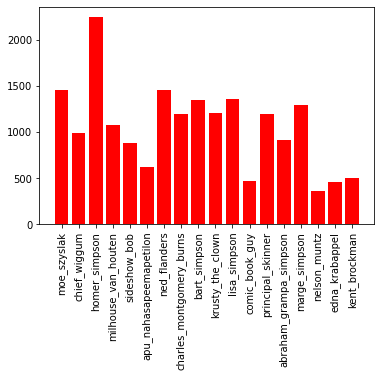

In [ ]:
import matplotlib.pyplot as plt

def gruposImagenes(titles):
  conteoCharacteres = dict()
  for valor in titles:
    for mapcharacter in MAP_CHARACTERS:
      if mapcharacter == valor:
        if MAP_CHARACTERS[valor] in conteoCharacteres:
          conteoCharacteres[MAP_CHARACTERS[valor]]+=1
        else:
          conteoCharacteres[MAP_CHARACTERS[valor]]=1
  return conteoCharacteres

personajes = gruposImagenes(y)
for etiqueta in personajes:
  print(f'{etiqueta}=>{personajes[etiqueta]}\n')

keys, values = personajes.keys(), personajes.values()
plt.bar(range(len(values)), values, color="r")
plt.xticks(range(len(values)), keys)
plt.xticks(rotation=90)
plt.show()

Contabilización del número de imágenes por cada personaje en el conjunto de Test.

comic_book_guy=>49

edna_krabappel=>50

homer_simpson=>50

moe_szyslak=>50

bart_simpson=>50

apu_nahasapeemapetilon=>50

sideshow_bob=>47

charles_montgomery_burns=>48

kent_brockman=>50

milhouse_van_houten=>49

chief_wiggum=>50

ned_flanders=>49

nelson_muntz=>50

principal_skinner=>50

krusty_the_clown=>50

abraham_grampa_simpson=>48

lisa_simpson=>50

marge_simpson=>50



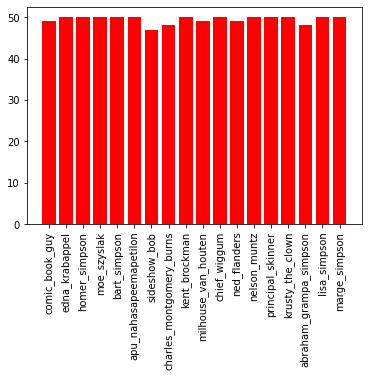

In [ ]:
personajes = gruposImagenes(y_t)
for etiqueta in personajes:
  print(f'{etiqueta}=>{personajes[etiqueta]}\n')

keys, values = personajes.keys(), personajes.values()
plt.bar(range(len(values)), values, color="r")
plt.xticks(range(len(values)), keys)
plt.xticks(rotation=90)
plt.show()

Con las agrupaciones anteriores se puede ver la distribución que se tiene para cada categoría. Mientras que el conjunto de "test", que se usará luego para las predicciones la distribución de los datos es proporcional, se tiene un número de imagenes similar para cada categoría, el conjunto "train" tiene más imagenes en algunas categorias y menos en otras, esta distribución en un análisis preliminar podría indicar que el modelo tendrá una mayor facilidad de predicción para las categorías con más ejemplos. Se observa también que los ejemplos para todas las categorias en "train" es mayor que los ejemplos a predecir en "test", por lo que se considera consistente la data proporcionada para el entrenamiento ya que se tiene un volumen de datos mayor para el entrenamiento.

En la siguiente sección se explora visualmente 20 imagenes del conjunto "train" para comprobar su correspondencia, y se procede a la normalización de los datos.

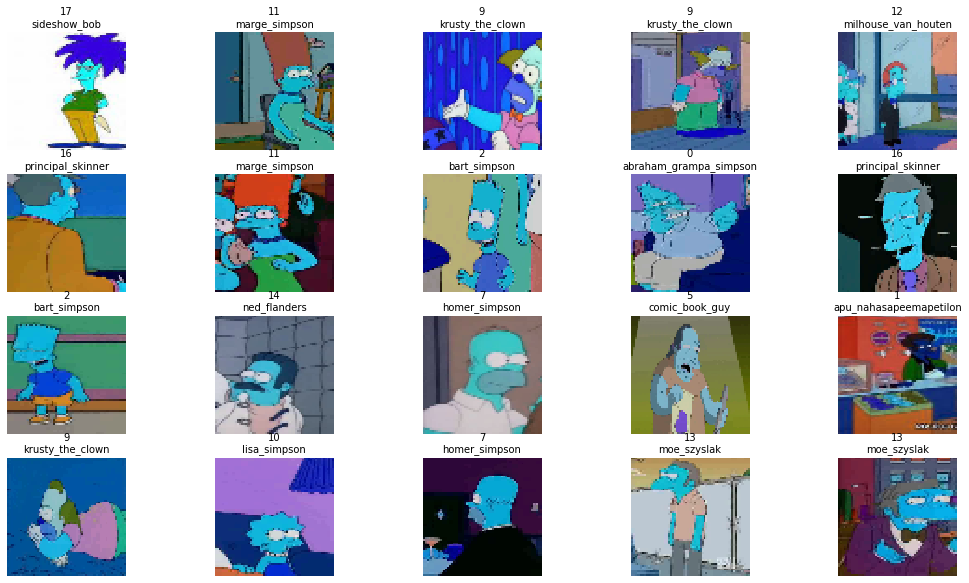

In [ ]:
def plots(num, figsize=(18,10), rows=4, interp=False):
    
        # if (ims.shape[-1] != 3):
            # ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = num//rows if num % 2 == 0 else num//rows + 1
    j=0
    for i in np.random.randint(0, len(X), num):
        sp = f.add_subplot(rows, cols, j+1)
        sp.axis('Off')
        title = f'{y[i]}\n{MAP_CHARACTERS[y[i]]}'
        sp.set_title(title, fontsize=10)
        plt.imshow(X[i], interpolation=None if interp else 'none')
        j+=1


plots(20)


Luego de realizar varias observaciones se tiene que los ejemplos proporcionados son correctos, por lo que se concluye que el conjunto de datos para entrenamiento es confiable.

### Total de categorías de Entrenamiento

In [ ]:
MAP_COMPLETO = dict()
index = 0
for i in os.listdir(DATASET_TRAIN_PATH_COLAB):
  MAP_COMPLETO[index] = i
  index+=1

print(f'El total de categorías: {len(MAP_COMPLETO)}, son las siguientes:\n {MAP_COMPLETO}')

X_Train_Cp, y_Train_Cp = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_COMPLETO)


El total de categorías: 47, son las siguientes:
 {0: 'snake_jailbird', 1: 'carl_carlson', 2: 'chief_wiggum', 3: 'otto_mann', 4: 'mayor_quimby', 5: 'krusty_the_clown', 6: 'jasper_beardly', 7: 'fat_tony', 8: 'principal_skinner', 9: 'hans_moleman', 10: 'lenny_leonard', 11: 'martin_prince', 12: 'waylon_smithers', 13: 'disco_stu', 14: 'selma_bouvier', 15: 'cletus_spuckler', 16: 'comic_book_guy', 17: 'agnes_skinner', 18: 'moe_szyslak', 19: 'jimbo_jones', 20: 'groundskeeper_willie', 21: 'sideshow_mel', 22: 'marge_simpson', 23: 'maggie_simpson', 24: 'professor_john_frink', 25: 'troy_mcclure', 26: 'patty_bouvier', 27: 'sideshow_bob', 28: 'milhouse_van_houten', 29: 'gil', 30: 'charles_montgomery_burns', 31: 'apu_nahasapeemapetilon', 32: 'bart_simpson', 33: 'nelson_muntz', 34: 'lionel_hutz', 35: 'bumblebee_man', 36: 'barney_gumble', 37: 'miss_hoover', 38: 'rainier_wolfcastle', 39: 'ned_flanders', 40: 'ralph_wiggum', 41: 'kent_brockman', 42: 'abraham_grampa_simpson', 43: 'homer_simpson', 44: 'edna

Al cargar la totalidad de los datos se puede observar en la lectura que hay personajes que no tienen ejemplos y que el mapa de personajes proporcionado mantiene coherencia ya que incluye a los personajes más relevantes como los que tienen un mayor número de ejemplos.

### Normalización de los datos de entrada

In [ ]:
# Normalización de los datos de entrada a la red

X=X/255      #Normalización imágenes del conjunto de Entrenamiento
X_t=X_t/255   #Normalización imágenes del conjunto de Test

## Data Augmentation para evitra overfitting

La herramienta de Data Augmentation consiste en realizar pequeñas transformaciones o perturbaciones aleatorias a una imagen para obtener nuevas imágenes para el entrenamiento conservando siempre la misma categoría a la que pertenece.

Este procedimiento se realiza aleatoriamente en varias de las imágenes del conjunto de entrenamiento.

In [ ]:
# Importación librerías para hacer el Data Augmentation
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Operaciones de variación para las imagenes de train
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	DATASET_TRAIN_PATH_COLAB,
	target_size=(IMG_SIZE,IMG_SIZE),
	class_mode='categorical',
  batch_size=32
)

# Operaciones de variación para las imagenes de test
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	DATASET_TEST_PATH_COLAB,
	target_size=(IMG_SIZE,IMG_SIZE),
	class_mode='categorical',
  batch_size=32
)

# Ajuste sobre los conjuntos de datos
training_datagen.fit(X)
validation_datagen.fit(X_t)


Found 20933 images belonging to 47 classes.
Found 0 images belonging to 0 classes.


## Obtención de los Datos de Validación 

Para un mejor modelado del clasificador se realizan varios pasos de validación en los que se comparan y contrastan diversos cambios realizados en el modelo previos a la evaluación final, dicha evaluación final dará una idea de la capacidad predictiva del clasificador construido. Por lo tanto el conjunto de Test se empleará exclusivamente para la evaluación final del modelo mientras que las evaluaciones parciales o validaciones se realizarán con el conjunto de Validación que se desprenderá del conjunto de Entrenamiento, su extensión será del 20% del conjunto de Entrenamiento, dejando el 80% restante para entrenar el modelo.

En consecuencia, se realiza una inspección del número de imágenes existentes en el conjunto de Entrenamiento, además de visualizar el tamaño de las imágenes. Este proceso se llevará a cabo para el conjunto de Test también.




In [ ]:
# Comando shape despliega un vector que indica la información requerida

print('Conjunto de Entrenamiento')
print('Imágenes:',X.shape)
print('Etiquetas:',y.shape)
print('\nConjunto de Test')
print('Imágenes:',X_t.shape)
print('Etiquetas:',y_t.shape)

Conjunto de Entrenamiento
Imágenes: (18992, 64, 64, 3)
Etiquetas: (18992,)

Conjunto de Test
Imágenes: (890, 64, 64, 3)
Etiquetas: (890,)


Como se puede observar el conjunto de Entrenamiento posee 18.992 imágenes con su correspondiente etiqueta, cada una de sus imágenes son a color (RGB) y tienen un tamaño de 64x64 píxeles. Mientras tanto el conjunto de Test posee 890 imágenes con sus respectivas etiquetas y con las mismas características que el conjunto de Entrenamiento.

La formación del conjunto de Validación con el 20% de los datos del conjunto de Entrenamiento, es decir con 3.798 imágenes, se efectuará con el siguiente código:

In [ ]:
# División del 20% y 80% de los datos para validacion y entrenamiento
 
X_valid, X_train = X[:3798], X[3798:]
y_valid, y_train = y[:3798], y[3798:]

print('Conjunto de Entrenamiento')
print('Imágenes:',X_train.shape)
print('Etiquetas:',y_train.shape)
print('\nConjunto de Validación')
print('Imágenes:',X_valid.shape)
print('Etiquetas:',y_valid.shape)
print('\nConjunto de Test')
print('Imágenes:',X_t.shape)
print('Etiquetas:',y_t.shape)


Conjunto de Entrenamiento
Imágenes: (15194, 64, 64, 3)
Etiquetas: (15194,)

Conjunto de Validación
Imágenes: (3798, 64, 64, 3)
Etiquetas: (3798,)

Conjunto de Test
Imágenes: (890, 64, 64, 3)
Etiquetas: (890,)


## Modelado de la Red Convolucional CNN


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

# Creación del modelo de la red CNN
model= Sequential()
# Añadidura de la primera capa Convolucional con el tamaño de la imagen de entrada
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE ,3)))
model.add(Activation('relu'))

# Segunda capa Convolucional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())  # Al normalizar inicialmente las imagenes, esta capa dejó de ser necesaria
model.add(Dropout(0.25))

# Tercera capa Convolucional
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# Cuarta Convolucional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Añadidura de la capa flaten para alimentar la nueva red profunda
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Añadidura de la capa final de salida que tendra el mismo numero de neuronas de salida que las clases que queremos clasificar
model.add(Dense(len(MAP_CHARACTERS)))
model.add(Activation('softmax'))

# Compilación del modelo
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Información resumida del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        1

### Entrenamiento de la Red CNN

In [ ]:
# Función callback para detener el entrenamiento cuando sea propicio

# En este caso el entrenamiento se detendrá cuando el parámetro "accuracy" no mejore pasadas 6 epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=6)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[callback], validation_data=(X_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 5s 22ms/step - loss: 2.2506 - accuracy: 0.3183 - val_loss: 1.6471 - val_accuracy: 0.5024
Epoch 2/30
238/238 [==============================] - 5s 21ms/step - loss: 1.3422 - accuracy: 0.6043 - val_loss: 1.2624 - val_accuracy: 0.6198
Epoch 3/30
238/238 [==============================] - 5s 21ms/step - loss: 0.9063 - accuracy: 0.7299 - val_loss: 0.8162 - val_accuracy: 0.7636
Epoch 4/30
238/238 [==============================] - 5s 20ms/step - loss: 0.6627 - accuracy: 0.8026 - val_loss: 0.9067 - val_accuracy: 0.7412
Epoch 5/30
238/238 [==============================] - 5s 21ms/step - loss: 0.5036 - accuracy: 0.8475 - val_loss: 0.7252 - val_accuracy: 0.8020
Epoch 6/30
238/238 [==============================] - 5s 21ms/step - loss: 0.3944 - accuracy: 0.8774 - val_loss: 0.8197 - val_accuracy: 0.8044
Epoch 7/30
238/238 [==============================] - 5s 21ms/step - loss: 0.3105 - accuracy: 0.9065 - val_loss: 0.6906 - val_accuracy: 0.8254

## Evaluación con los datos de Test del modelo generado


In [ ]:
# Evaluación del modelo con el conjunto de Test

model.evaluate(X_t, y_t)

28/28 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.9685


[0.2711743116378784, 0.968539297580719]

## Análisis de Resultados


In [ ]:
# Importación de la herramienta classification_report
import sklearn
from sklearn.metrics import classification_report

# Obtención de todo el conjunto de clases de predicción en base a los datos de Test
y_pred = model.predict(X_t)

print('\n', classification_report(y_t, np.argmax(y_pred, axis=1), 
                                  target_names=list(MAP_CHARACTERS.values())), sep='')




                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.88      0.94      0.91        48
  apu_nahasapeemapetilon       0.98      1.00      0.99        50
            bart_simpson       0.94      0.98      0.96        50
charles_montgomery_burns       0.96      0.98      0.97        48
            chief_wiggum       1.00      1.00      1.00        50
          comic_book_guy       1.00      0.98      0.99        49
          edna_krabappel       0.98      0.98      0.98        50
           homer_simpson       0.86      0.96      0.91        50
           kent_brockman       1.00      0.92      0.96        50
        krusty_the_clown       0.98      1.00      0.99        50
            lisa_simpson       0.92      0.94      0.93        50
           marge_simpson       1.00      0.98      0.99        50
     milhouse_van_houten       1.00      0.98      0.99        49
             moe_szyslak       0.98      0.92      0.95        50
        

Como se puede observar en la celda anterior, se despliega una tabla donde se indica las métricas de precision y recall para cada clase, además de la métrica f1-score.

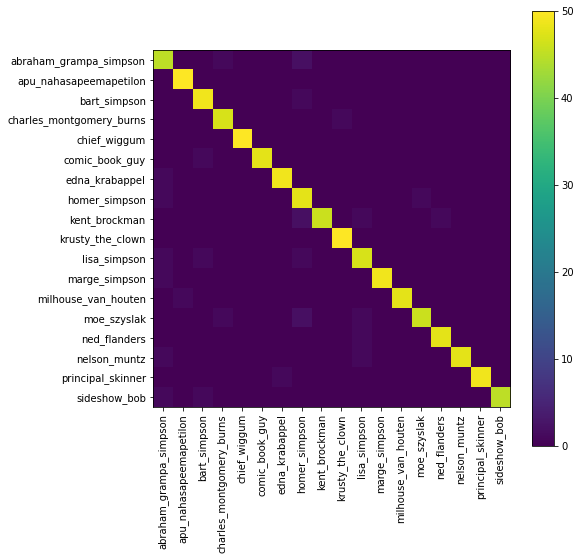

In [ ]:
# Matriz de confusión para visualizar los casos más comunes de clasificación errónea
# Con el siguiente código se construirá una matriz de confusión gráfica

plt.figure(figsize=(8,8))
matrix = sklearn.metrics.confusion_matrix(y_t, np.argmax(y_pred, axis=1))
clases = list(MAP_CHARACTERS.values())
plt.imshow(matrix, interpolation='nearest')
plt.colorbar()
etiquetas = np.arange(len(clases))
_ = plt.xticks(etiquetas, clases, rotation=90)
_ = plt.yticks(etiquetas, clases)

In [ ]:
# Despliegue de los valores numéricos de la matriz de confusión

print(matrix)

[[45  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 48  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 46  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  1  0  0 47  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  2  0  0  1  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0 48  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 49  0]
 [ 1  0  1  0  0  0  0  0  0  0

En la matriz de confusión impresa anteriormente se puede observar que la clase número 8 (homer_simpson) es la más difícil de predecir puesto que el modelo clasifica acertadamente 48 imágenes pero clasifica erróneamente 8 imágenes, en la métrica de precision se observa que esta clase es la que menor precisión alcanza con un 86%; a diferencia de la clase 5 (chief_wiggum) que es la mejor predicha alcanzando el 100% de precisión.

En términos generales, el modelo tiene una elevada capacidad de predicción para todas las 18 clases entrenadas, supera el 92% de accuracy en todas las categorías exceptuando la clase "abraham_grandpa_simpson" y "homer_simpson".

## Selección aleatoria del conjunto de Test para predecir 
### (se despliegan 4 probabilidades para cada clase predicha por el modelo)

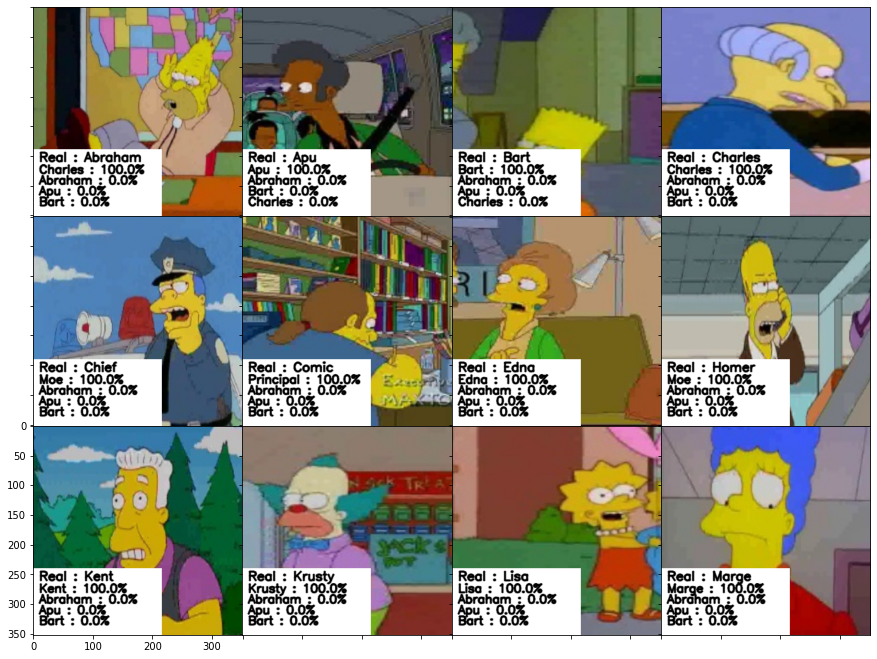

In [ ]:
from mpl_toolkits.axes_grid1 import AxesGrid

# funcion para desplegar resultados de las predicciones
def despliega_resultados(model, nombres_categorias):
  F = plt.figure(1, (15,20))
  grid = AxesGrid(F, 111, nrows_ncols=(3, 4), axes_pad=0, label_mode="1")

  for i in range(12):
      personaje = nombres_categorias[i]
      
      # Selecciono una imagen aleatoria del conjunto de test y la estandarizo para el modelo
      image = cv2.imread(np.random.choice([k for k in glob.glob(DATASET_TEST_PATH_COLAB + '/*.*') if personaje in k]))
      img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      pic = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
      real = personaje.split('_')[0].title()
      
      # Obtengo el vector de predcciones para esa imagen y creo un vector de texto con las 4 mejores probabilidades lo ordeno de mayor a menor
      predicted = model.predict(pic.reshape(1, 64, 64,3))[0]
      predicciones = sorted(['{:s} : {:.1f}%'.format(nombres_categorias[k].split('_')[0].title(), 100*v) for k,v in enumerate(predicted)], 
        key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:4]
      
      #Regreso las imagenes al tamaño original para mejorar el despligue
      img = cv2.resize(img, (352, 352))
      
      # Añado la caja de texto con la etiqueta real y las predicciones
      cv2.rectangle(img, (0,240),(215,352),(255,255,255), -1)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, 'Real : %s' % real, (10, 260), font, 0.7,(0,0,0),2,cv2.LINE_AA)
      for k, t in enumerate(predicciones):
          cv2.putText(img, t,(10, 280+k*18), font, 0.65,(0,0,0),2,cv2.LINE_AA)
      
      grid[i].imshow(img)

despliega_resultados(model, MAP_CHARACTERS)

## Modelado de una Red Neuronal Profunda DNN para comparar resultados

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

DNN_model= keras.models.Sequential()

DNN_model.add(keras.layers.Flatten(input_shape=[IMG_SIZE,IMG_SIZE,3]))  # imagen a color

DNN_model.add(keras.layers.Dense(512, activation="relu"))
# DNN_model.add(BatchNormalization())  # Al omitir esta operacion la presicion total de modelo nunca superó el 15%
DNN_model.add(keras.layers.Dense(256, activation="relu"))
DNN_model.add(Dropout(0.25))
DNN_model.add(keras.layers.Dense(256, activation="relu"))
DNN_model.add(Dropout(0.25))
DNN_model.add(keras.layers.Dense(64, activation="relu"))

# Última capa con el número de neuronas de las clases a predecir
DNN_model.add(keras.layers.Dense(len(MAP_CHARACTERS), activation="softmax"))

DNN_model.summary()

# Se ha modelado una DNN con un número similar de parametros a la Convolucional CNN
# Para que la comparación de la complejidad a nivel de parametros sea similar
# CNN Total params: 6,497,842
# DNN Total params: 6,467,666

optimizer = Adam(lr=0.001, beta_1=0.85, beta_2=0.95 )
DNN_model.compile(loss="sparse_categorical_crossentropy", optimizer= optimizer, metrics =["accuracy"])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

### Entrenamiento del modelo DNN

In [ ]:
# se detendrá si no existe mejora en 3 epocas consecutivas
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Entrenamiento del modelo con la condición de parada automática
history_top = DNN_model.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=[callback],
                            validation_data=(X_valid, y_valid))

Epoch 1/50
238/238 [==============================] - 2s 6ms/step - loss: 2.8201 - accuracy: 0.1224 - val_loss: 2.5891 - val_accuracy: 0.1933
Epoch 2/50
238/238 [==============================] - 1s 5ms/step - loss: 2.4032 - accuracy: 0.2552 - val_loss: 2.2690 - val_accuracy: 0.3149
Epoch 3/50
238/238 [==============================] - 1s 5ms/step - loss: 2.1987 - accuracy: 0.3232 - val_loss: 2.0918 - val_accuracy: 0.3628
Epoch 4/50
238/238 [==============================] - 1s 5ms/step - loss: 2.0710 - accuracy: 0.3653 - val_loss: 2.0003 - val_accuracy: 0.3894
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: 1.9826 - accuracy: 0.3937 - val_loss: 1.9509 - val_accuracy: 0.4123
Epoch 6/50
238/238 [==============================] - 1s 5ms/step - loss: 1.9023 - accuracy: 0.4212 - val_loss: 1.9877 - val_accuracy: 0.3949
Epoch 7/50
238/238 [==============================] - 1s 5ms/step - loss: 1.8159 - accuracy: 0.4400 - val_loss: 1.8377 - val_accuracy: 0.4397
Epoch 

### Evaluación del modelo DNN

In [ ]:
DNN_model.evaluate(X_t,y_t)

28/28 [==============================] - 0s 3ms/step - loss: 0.8966 - accuracy: 0.7517


[0.8966384530067444, 0.751685380935669]

### Comparación modelo CNN y modelo DNN

In [ ]:
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara la Presición de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="red")
    plt.plot(history1.history['val_accuracy'], 'r--', color="red")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()

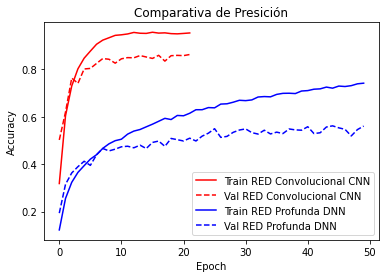


                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.61      0.65      0.63        48
  apu_nahasapeemapetilon       0.82      0.92      0.87        50
            bart_simpson       0.52      0.66      0.58        50
charles_montgomery_burns       0.86      0.75      0.80        48
            chief_wiggum       0.75      0.94      0.83        50
          comic_book_guy       0.92      0.67      0.78        49
          edna_krabappel       1.00      0.64      0.78        50
           homer_simpson       0.60      0.66      0.63        50
           kent_brockman       0.91      0.82      0.86        50
        krusty_the_clown       0.79      0.88      0.83        50
            lisa_simpson       0.65      0.48      0.55        50
           marge_simpson       0.86      0.86      0.86        50
     milhouse_van_houten       0.92      0.71      0.80        49
             moe_szyslak       0.77      0.82      0.80        50
        

In [ ]:
# procedemos a comparar la presicion de los dos modelos en base a la funcion proporcionada
plot_compare_accs(history, history_top, "RED Convolucional CNN", "RED Profunda DNN", "Comparativa de Presición")

# Obtenemos todo el conjunto de clases de predicción en base a los datos de TEST
y_pred = DNN_model.predict(X_t)

print('\n', classification_report(y_t, np.argmax(y_pred, axis=1), 
                                  target_names=list(MAP_CHARACTERS.values())), sep='')

Como se observan en las gráficas de comparación, el modelo CNN es más eficiente que el modelo DNN alcanzando un val_accuracy aproximado del 86%, mientras que la red DNN alcanza un val_accuracy aproximado del 56%. Cuando se evalúan los modelos con el conjunto de Test se obtienen los sigueites resultados: 

*   Accuracy de la red CNN: 96.85%
*   Accuracy de la red DNN: 75.17%



## Implementación de diferentes Arquitecturas

### Arquitectura 1

In [ ]:
#Construimos una función con la aquitectura de red convolucional , utilizaremos 2 capas convolucionales, controlaremos iterpolaridad con MaxPooling2D
#Aplanaremos el vector con la capa "model.add(Flatten())" y conectaremos todo con una capa densa con las salidas Y, no utilizaremos 
#BatchNormalization y Dropout 
def make_model_AR1():
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same', input_shape=(64,64,3)))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(len(MAP_CHARACTERS), activation='softmax'))
  return model

Arquitectura 1 , Modelo 1: Se compilará con el optimizador sgd, para entrenar el modelo se utilizarán 30 épocas y se conservará el batch_size de 64

In [ ]:
# Modelo Prueba 1 , compilaremos con el optimizador sgd, para entrenar el modelo utilizaremos 30 épocas y conservamos el batch_size de 64   
model_P1 = make_model_AR1()
model_P1.compile(optimizer='sgd',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=6)

history_P1= model_P1.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[callback], validation_data=(X_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 4s 18ms/step - loss: 2.7497 - accuracy: 0.1398 - val_loss: 2.6150 - val_accuracy: 0.2001
Epoch 2/30
238/238 [==============================] - 4s 17ms/step - loss: 2.3951 - accuracy: 0.2654 - val_loss: 2.2452 - val_accuracy: 0.3375
Epoch 3/30
238/238 [==============================] - 4s 17ms/step - loss: 2.0935 - accuracy: 0.3721 - val_loss: 2.0409 - val_accuracy: 0.3847
Epoch 4/30
238/238 [==============================] - 4s 17ms/step - loss: 1.8669 - accuracy: 0.4504 - val_loss: 2.0543 - val_accuracy: 0.3913
Epoch 5/30
238/238 [==============================] - 4s 17ms/step - loss: 1.7033 - accuracy: 0.5024 - val_loss: 1.9074 - val_accuracy: 0.4481
Epoch 6/30
238/238 [==============================] - 4s 17ms/step - loss: 1.5696 - accuracy: 0.5390 - val_loss: 1.7064 - val_accuracy: 0.4882
Epoch 7/30
238/238 [==============================] - 4s 17ms/step - loss: 1.4597 - accuracy: 0.5758 - val_loss: 2.2046 - val_accuracy: 0.3512

In [ ]:
model_P1.evaluate(X_t, y_t)

28/28 [==============================] - 0s 5ms/step - loss: 0.2928 - accuracy: 0.9404


[0.2927723824977875, 0.9404494166374207]

Arquitectura 1, Modelo 2: Se compilará con el optimizador adam, para entrenar el modelo se utilizarán 30 épocas y se conservará el batch_size de 64

In [ ]:
# Modelo Prueba 2 , compilaremos con el optimizador adam, para entrenar el modelo utilizaremos 30 épocas y conservamos el batch_size de 64   
model_P2 = make_model_AR1()
model_P2.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=6)

history_P2= model_P2.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[callback], validation_data=(X_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 4s 18ms/step - loss: 2.2496 - accuracy: 0.3247 - val_loss: 1.8423 - val_accuracy: 0.4797
Epoch 2/30
238/238 [==============================] - 4s 17ms/step - loss: 1.4726 - accuracy: 0.5723 - val_loss: 1.3570 - val_accuracy: 0.6053
Epoch 3/30
238/238 [==============================] - 4s 17ms/step - loss: 1.0476 - accuracy: 0.6967 - val_loss: 1.0859 - val_accuracy: 0.6862
Epoch 4/30
238/238 [==============================] - 4s 17ms/step - loss: 0.7394 - accuracy: 0.7861 - val_loss: 0.9961 - val_accuracy: 0.7191
Epoch 5/30
238/238 [==============================] - 4s 17ms/step - loss: 0.5078 - accuracy: 0.8500 - val_loss: 0.9848 - val_accuracy: 0.7375
Epoch 6/30
238/238 [==============================] - 4s 17ms/step - loss: 0.3351 - accuracy: 0.9005 - val_loss: 0.9956 - val_accuracy: 0.7575
Epoch 7/30
238/238 [==============================] - 4s 17ms/step - loss: 0.2072 - accuracy: 0.9402 - val_loss: 1.0725 - val_accuracy: 0.7470

In [ ]:
model_P2.evaluate(X_t, y_t)

28/28 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.9404


[0.4693073332309723, 0.9404494166374207]

#### Gráfica de resultados Arquitectura 1

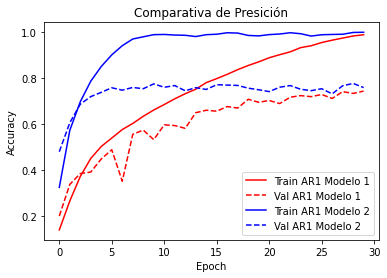

In [ ]:
def plot_compare_accs_A1(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara la Presición de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="red")
    plt.plot(history1.history['val_accuracy'], 'r--', color="red")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
plot_compare_accs_A1(history_P1, history_P2, "AR1 Modelo 1", "AR1 Modelo 2", "Comparativa de Presición")

Se puede apreciar que ambos modelos de la Arquitectura 1 alcanzan valores similares de accuracy y val_accuracy, pero el Modelo 1 se demora menor tiempo en converger, le toma alrededor de las 10 épocas en converger mientras que el Modelo 2 se demora 30 épocas aproximadamente.

### Arquitectura 2

In [ ]:
#Construimos una función con la aquitectura de red convolucional , utilizaremos 4 capas convolucionales, controlaremos iterpolaridad con MaxPooling2D
#Aplanaremos el vector con la capa "model.add(Flatten())", cada capa tendrá BatchNormalization y Dropout, conectaremos todo con una capa densa con las salidas Y
def make_model_AR2():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(64,64,3)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(len(MAP_CHARACTERS), activation='softmax'))
  return model

Arquitectura 2 , Modelo 1: Se compilará con el optimizador adam, para entrenar el modelo se utilizarán 30 épocas y se conservará el batch_size de 64

In [ ]:
# Modelo Prueba 1 , compilaremos con el optimizador adam, para entrenar el modelo utilizaremos 30 épocas y conservamos el batch_size de 64   
model_m1 = make_model_AR2()
model_m1.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=6)

history_m1= model_m1.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[callback], validation_data=(X_valid, y_valid))


Epoch 1/30
238/238 [==============================] - 14s 59ms/step - loss: 2.3994 - accuracy: 0.3478 - val_loss: 3.0362 - val_accuracy: 0.2059
Epoch 2/30
238/238 [==============================] - 14s 57ms/step - loss: 1.3621 - accuracy: 0.5991 - val_loss: 1.8896 - val_accuracy: 0.4142
Epoch 3/30
238/238 [==============================] - 14s 58ms/step - loss: 0.8598 - accuracy: 0.7469 - val_loss: 0.8107 - val_accuracy: 0.7575
Epoch 4/30
238/238 [==============================] - 14s 58ms/step - loss: 0.5142 - accuracy: 0.8508 - val_loss: 0.6087 - val_accuracy: 0.8270
Epoch 5/30
238/238 [==============================] - 14s 57ms/step - loss: 0.3015 - accuracy: 0.9119 - val_loss: 1.0809 - val_accuracy: 0.7451
Epoch 6/30
238/238 [==============================] - 14s 57ms/step - loss: 0.1941 - accuracy: 0.9436 - val_loss: 0.5542 - val_accuracy: 0.8478
Epoch 7/30
238/238 [==============================] - 14s 57ms/step - loss: 0.1331 - accuracy: 0.9620 - val_loss: 0.5920 - val_accuracy:

In [ ]:
model_m1.evaluate(X_t, y_t)

28/28 [==============================] - 0s 9ms/step - loss: 0.1540 - accuracy: 0.9697


[0.1539507806301117, 0.9696629047393799]

Arquitectura 2, Modelo 2: Modelo anterior añadiendo más épocas (40 épocas)

In [ ]:
model_m2 = make_model_AR2()
model_m2.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=6)

history_m2= model_m2.fit(X_train, y_train, epochs=40, batch_size=64, callbacks=[callback], validation_data=(X_valid, y_valid))

Epoch 1/40
238/238 [==============================] - 14s 59ms/step - loss: 2.3993 - accuracy: 0.3515 - val_loss: 3.1734 - val_accuracy: 0.1717
Epoch 2/40
238/238 [==============================] - 14s 58ms/step - loss: 1.4365 - accuracy: 0.5813 - val_loss: 1.7761 - val_accuracy: 0.4689
Epoch 3/40
238/238 [==============================] - 14s 58ms/step - loss: 0.9537 - accuracy: 0.7186 - val_loss: 0.8135 - val_accuracy: 0.7575
Epoch 4/40
238/238 [==============================] - 14s 58ms/step - loss: 0.5936 - accuracy: 0.8234 - val_loss: 0.6878 - val_accuracy: 0.8046
Epoch 5/40
238/238 [==============================] - 14s 57ms/step - loss: 0.3521 - accuracy: 0.9007 - val_loss: 0.6306 - val_accuracy: 0.8189
Epoch 6/40
238/238 [==============================] - 14s 57ms/step - loss: 0.2242 - accuracy: 0.9347 - val_loss: 0.5858 - val_accuracy: 0.8399
Epoch 7/40
238/238 [==============================] - 14s 57ms/step - loss: 0.1378 - accuracy: 0.9593 - val_loss: 0.6078 - val_accuracy:

In [ ]:
model_m2.evaluate(X_t, y_t)

28/28 [==============================] - 0s 8ms/step - loss: 0.2141 - accuracy: 0.9596


[0.21408960223197937, 0.9595505595207214]

Arquitectura 2, Modelo 3: Modelo anterior con 30 épocas y diferentes hiperparámetros para el optimizador Adam

In [ ]:
model_m3 = make_model_AR2()

optimizer = tf.keras.optimizers.Adam (lr=0.001)

model_m3.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

history_m3= model_m3.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[reduce_lr], validation_data=(X_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 14s 59ms/step - loss: 2.3688 - accuracy: 0.3566 - val_loss: 3.0582 - val_accuracy: 0.1006
Epoch 2/30
238/238 [==============================] - 14s 58ms/step - loss: 1.3785 - accuracy: 0.5971 - val_loss: 1.8371 - val_accuracy: 0.4294
Epoch 3/30
238/238 [==============================] - 14s 58ms/step - loss: 0.8886 - accuracy: 0.7376 - val_loss: 1.1322 - val_accuracy: 0.6722
Epoch 4/30
238/238 [==============================] - 14s 58ms/step - loss: 0.5539 - accuracy: 0.8355 - val_loss: 0.6601 - val_accuracy: 0.8152
Epoch 5/30
238/238 [==============================] - 14s 57ms/step - loss: 0.3191 - accuracy: 0.9081 - val_loss: 0.6303 - val_accuracy: 0.8186
Epoch 6/30
238/238 [==============================] - 14s 57ms/step - loss: 0.1954 - accuracy: 0.9449 - val_loss: 0.5938 - val_accuracy: 0.8360
Epoch 7/30
238/238 [==============================] - 14s 57ms/step - loss: 0.1264 - accuracy: 0.9672 - val_loss: 0.5985 - val_accuracy:

In [ ]:
#mejoramos el modelo llegamos a un 97.5% con la ayuda de hipermarámetros al otimizador adam
model_m3.evaluate(X_t, y_t)

28/28 [==============================] - 0s 8ms/step - loss: 0.1051 - accuracy: 0.9742


[0.10512854158878326, 0.9741572737693787]

#### Gráfica de resultados Arquitectura 2

### Comparación modelos 1, 2 y 3 de la Arquitectura 2

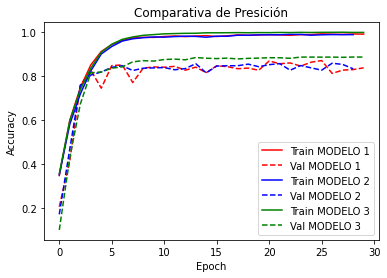

In [ ]:
def plot_compare_accs_A2(history1, history2, history3 ,name1="Red 1",
                      name2="Red 2",name3="Red 3", title="Graph title"):
    """Compara la Presición de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="red")
    plt.plot(history1.history['val_accuracy'], 'r--', color="red")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.plot(history3.history['accuracy'], color="green")
    plt.plot(history3.history['val_accuracy'], 'r--', color="green")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3], 
               loc='lower right')
    plt.show()
plot_compare_accs_A2(history_m1, history_m2,history_m3, "MODELO 1", "MODELO 2", "MODELO 3", "Comparativa de Presición")

Como se observan en las gráficas de comparación el modelo 3 es ligeramente más eficiente, cada uno de los modelos tienen las siguientes características: 

*   Modelo 1: Train accuracy: 99.10%, val_accuraccy: 83.78%, Test accuracy: 96.97%
*   Modelo 2: Train accuracy: 98.85%, val_accuraccy: 83.33%, Test accuracy: 95.96%
*   Modelo 3: Train accuracy: 99.87%, val_accuraccy: 88.65%, Test accuracy: 97.42%

## Conclusiones

*   En esta práctica se normalizaron los datos de entrada al principio, es decir, antes de entrenar los modelos con ellos; se probó además normalizar los datos en el momento del entrenamiento mediante la herramienta "Batch Normalization" y se obtuvieron buenos resultados también.
*   Se modeló una Red Neuronal Profunda DNN no se consiguieron buenos resultados, por lo que se comprueba la efectividad de las Redes Neuronales Convolucionales CNN para el procesamiento de imágenes.
*   El conjunto de Entrenamiento utilizado tiene una alta dispersión en las 18 categorías existentes, es decir hay muchas imágenes para ciertas categorías y pocas imágenes para otras categorías; a diferencia del conjunto de Test que tiene una baja dispersión. Esto podría explicar el hecho de que los modelos predicen unas clases mejor que otras.
*   El conjunto de Entrenamiento se dividió en un conjunto propio de entrenamiento y un conjunto de Validación en proporciones del 80% y 20% respectivamente, esto se realiza para efectuar el número de validaciones necesarias para lograr la construcción de un modelo eficiente, dejando el conjunto de Test exclusivamente para medir la capacidad de predicción del modelo ya que dicho conjunto funciona como una simulación del mundo real.



## Impresión del notebook en PDF

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Actividad_2,_Convolutional_Neural_Networks.ipynb')

--2020-11-09 19:12:19--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1301 (1.3K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.27K  --.-KB/s    in 0s      

2020-11-09 19:12:20 (84.5 MB/s) - ‘colab_pdf.py’ saved [1301/1301]

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'